# Day 2 - using Matplotlib

 Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack. It was developed in 2003, to enable interactive MATLAB style plotting in Python. Fun fact: Matplotlib received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Space Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

This notebook has been adapted from a series of excellent tutorial notebooks published as part of the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). Do check them out!

Let's explore Matplotlib!

## 1. Getting Started


### 1.1. Importing Matplotlib


Just as we use the ``np`` shorthand for NumPy, we will use some standard shorthands for Matplotlib imports:

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The ``plt`` interface is what we will use most often.

### 1.2. Setting styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [0]:
plt.style.use('classic')

We will discuss stylesheets and other customizable style parameters in Matplotlib later in section 4 of this this notebook.

## 2. Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.
As with all the following sections, we'll start by setting up the notebook for plotting and  importing the packages we will use:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

### 2.1. Example with common ``pyplot`` features  ($y = \textrm{sin}(x - k)$)

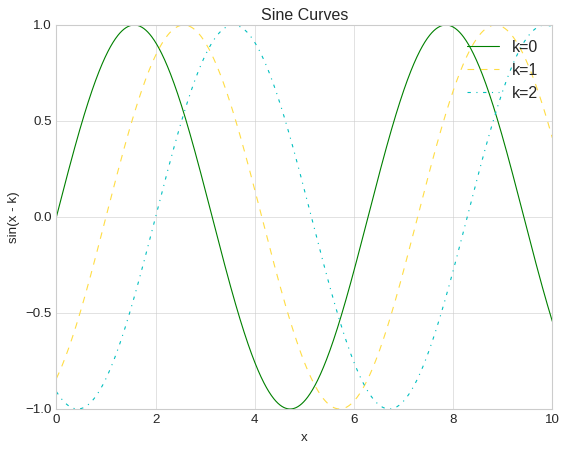

In [4]:
x = np.linspace(0, 10, 1000)    # abscissa values

# Plot a few sinusoids with different colors, linestyles and labels

fig = plt.figure()    # intialize a figure object

plt.plot(x, np.sin(x - 0), color='g', linestyle='-', label='k=0')    # solid green line
plt.plot(x, np.sin(x - 1), color='#FFDD44', linestyle='--', label='k=1')  # dashed line with color specified in Hex code
plt.plot(x, np.sin(x - 2), '-.c', label='k=2')    # dashdot cyan line specified with one code  

# Add title and axes labels

plt.title("Sine Curves")
plt.xlabel("x")
plt.ylabel("sin(x - k)")

# Create a legend

plt.legend()  

### 2.2. Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [0]:
fig.savefig('my_figure.png')

We now have a file called ``my_figure.png`` in the current working directory:

In [6]:
!ls -lh my_figure.png    # The ls command is a command-line utility for listing the contents of a directory

-rw-r--r-- 1 root root 55K Jun 15 21:16 my_figure.png


To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

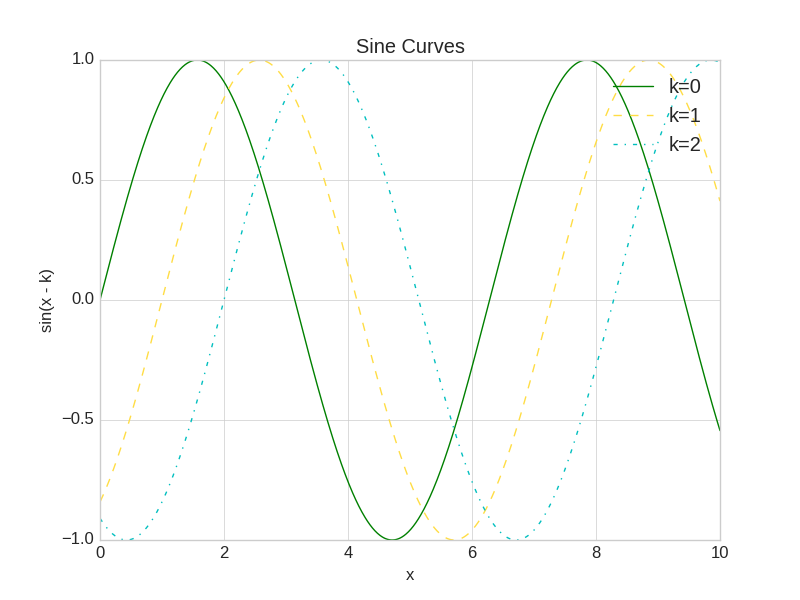

In [7]:
from IPython.display import Image
Image('my_figure.png')

### 2.3. Subplots and the object-oriented interface

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact. The MATLAB-style tools are contained in the pyplot (``plt``) interface, which we have been using so far. For example, the following code will probably look quite familiar to MATLAB users:

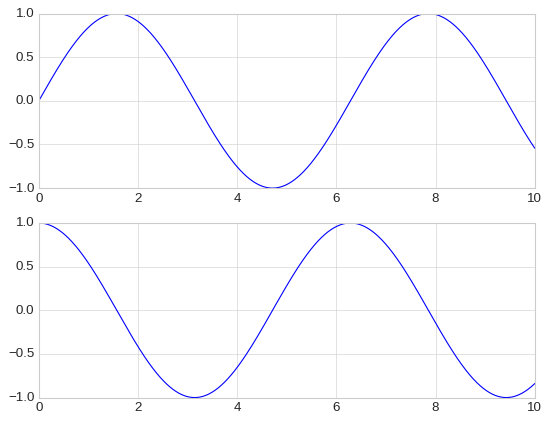

In [8]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied. While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?

This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
To re-create the previous plot using this style of plotting, you might do the following:

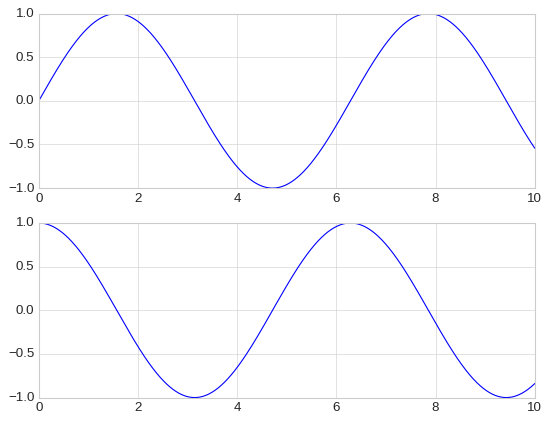

In [9]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.

### Task: Create the plot shown below and save it as `task1.pdf`.

![Task-1 plot](images/task1.png)

Make sure your plot has the following properties:

1. The figure size should be 9 inches by 9 inches
2. Y-axis label fontsize should be 15
3. Clockwise from the top-left panel, the lines are solid-green, dashed-cyan, dashdot-black and dotted-red. Hint: Recall that the code for linestyle and linecolor can be combined into one code. The codes for solid, dashed, dashdot and dotted linestyles are '-','--','-.',':' respectively. The codes for the colors green, cyan, black and red are 'g','c','k' and 'r' respectively. 
4. You are encouraged to use the object-oriented style (`ax.plot`) to define the subplots. However, given the simple exercise, you can also use `plt.plot`.

If you are unsure about the exact syntax, I highly encourage simply searching it online.

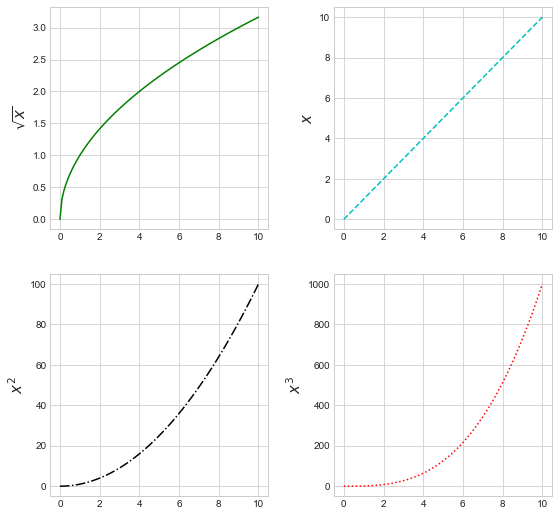

In [2]:
x = np.linspace(0,10,100)    # define an array using np.linspace with start=0, stop=10, and num=100

# create a grid of plots 

fig, ax = plt.subplots(nrows=2 , ncols=2 , figsize=(9 , 9)) 

# if using plt.plot, you can initialize the figure with fig = plt.figure(figsize= )

labels = ['$\sqrt{x}$', '$x$', '$x^2$', '$x^3$']    # matplotlib labels have Latex support
label_fs = 15   # define fontsize for the y-axis labels

# ax is a (2,2) array of matplotlib subplot objects. 
# you can access each subplot just like you would access 
# elements of a numpy array

# top-left subplot

ax[0,0].plot(x, np.sqrt(x), '-g') # solid green
ax[0,0].set_ylabel(labels[0], fontsize=label_fs)

# top-right sub-plot

ax[0,1].plot(x,x, '--c') # dashed cyan
ax[0,1].set_ylabel(labels[1], fontsize=label_fs)

# bottom-left subplot

ax[1,0].plot(x, x**2, '-.k') # dashdot black
ax[1,0].set_ylabel(labels[2], fontsize=label_fs)

# bottom-right subplot

ax[1,1].plot(x, x**3, ':r') # dotted red
ax[1,1].set_ylabel(labels[3], fontsize=label_fs)

plt.subplots_adjust(wspace=0.3)    # adjust the width between subplots to provide room for y-axis labels

# save figure using fig.savefig()

fig.savefig('task1.pdf')

In [ ]:
# Alternate solution using plt.plot()

x = np.linspace(0,10,100)

fig = plt.figure(figsize=(9,9))

labels = ['$\sqrt{x}$', '$x$', '$x^2$', '$x^3$']
label_fs = 15

plt.subplot(2,2,1)
plt.plot(x, np.sqrt(x), '-g') # solid green
plt.ylabel(labels[0], fontsize=label_fs)

plt.subplot(2,2,2)
plt.plot(x,x, '--c') # dashed cyan
plt.ylabel(labels[1], fontsize=label_fs)

plt.subplot(2,2,3)
plt.plot(x, x**2, '-.k') # dashdot black
plt.ylabel(labels[2], fontsize=label_fs)

plt.subplot(2,2,4)
plt.plot(x, x**3, ':r') # dotted red
plt.ylabel(labels[3], fontsize=label_fs)

plt.subplots_adjust(wspace=0.3)

fig.savefig('task1.pdf')

## 3. Simple Scatter Plot


Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.

### 3.1. Using ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:


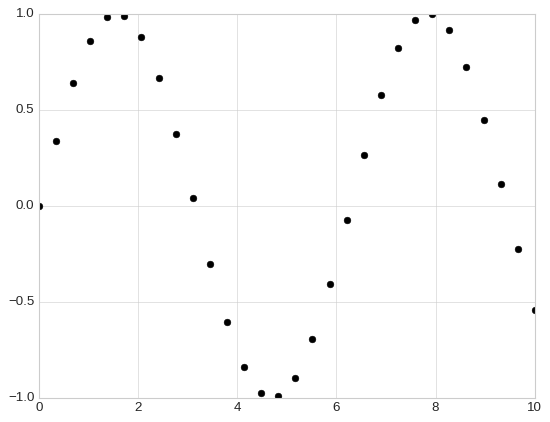

In [10]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

### 3.2. Using ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

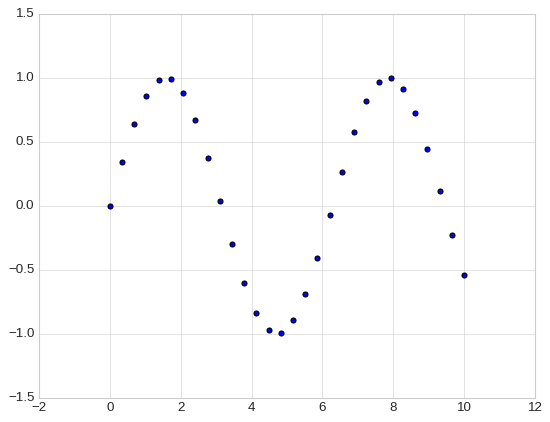

In [11]:
plt.scatter(x, y, marker='o')

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

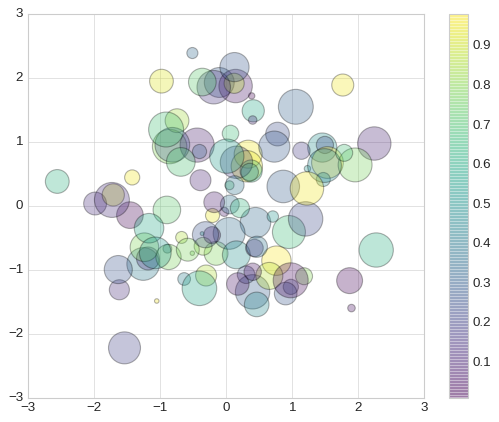

In [12]:
rng = np.random.RandomState(0)    # initialize a random generator
x = rng.randn(100)    # an array of random numbers sampled from a normal distribution with mean 0 and variance 1
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

### 3.3. Adding errorbars with ``plt.errorbar``

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information. 

A basic errorbar can be created with a single Matplotlib function call:

<ErrorbarContainer object of 3 artists>

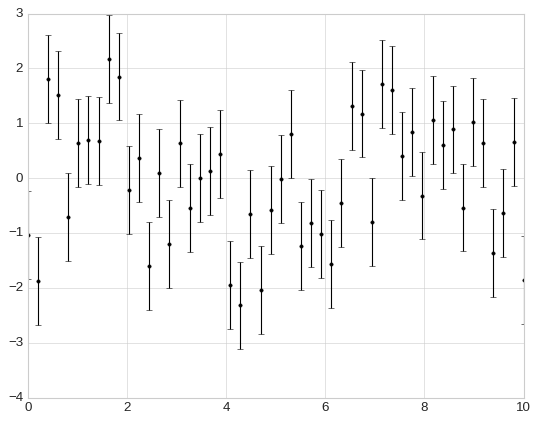

In [13]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k')

Here the ``fmt`` is a format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in ``plt.plot``, outlined in the previous sections.

In addition to these basic options, the ``errorbar`` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves:

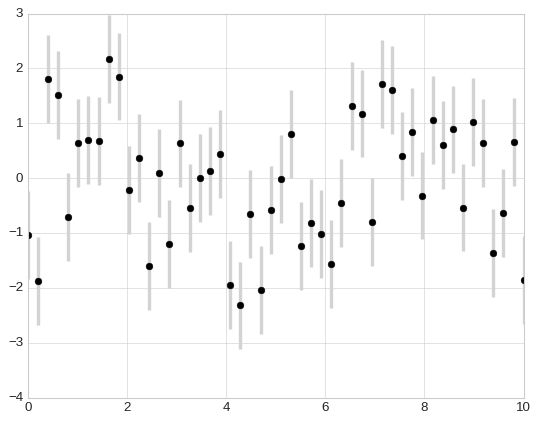

In [14]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

### Task: Create the shown below

![Task-2 plot](images/task2.png)

Make sure your plot has the following properties:

1. The figure size should be 9 inches by 6 inches
2. You are first plotting the function $y=x$. It should be a solid blue line.
3. Next, you are adding Gaussian noise to $y$, by using numpy's `random.randn` function, such that the $\sigma$ of the distribution is 0.5. The [documentation for this function](https://numpy.org/devdocs/reference/random/generated/numpy.random.randn.html) will provide a clue as to how to accomplish this. 
4. Use `plt.errorbar` to plot the data points and error-bars, with the following properties:
    - data symbol should be hexagon
    - data symbol's color should be 'darkblue'
    - data symbol's size should be 6
    - error-bar's color should be 'lightblue'
    - error-bar's width should be 3
    - error-bars should not have caps.
    
5. Tick-labels for both x and y axes should have a fontsize of 14. Look this up online.

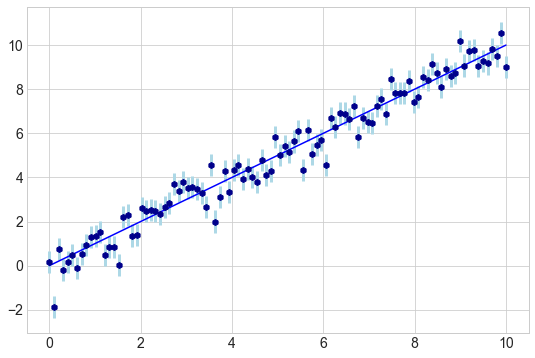

In [5]:
x = np.linspace(0,10,100)

y = np.copy(x)    # numpy's copy function creates a copy of an array

fig = plt.figure(figsize=(9,6))    # initialize figure with a given size

# plot y before adding noise

plt.plot(x,y,'-b')    # solid blue line

# add gaussian noise to y with sigma of 0.5

sigma = 0.5

noise = sigma*np.random.randn(100)

y = y + noise

plt.errorbar(x, y, yerr=sigma, fmt='h', color='darkblue',markersize=6,
             ecolor='lightblue', elinewidth=3, capsize=0)

# Look up how to increase fontsize of xticks label
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## 4. Customizing Matplotlib: `rcParams` and `stylesheets`

The ability to customize Matplotlib's default settings helps bring the package inline with your own aesthetic preferences. Here we'll walk through some of Matplotlib's runtime configuration (rc) options, and take a look at the newer *stylesheets* feature, which contains some nice sets of default configurations.

### 4.1. Changing the Defaults: rcParams

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.
This configuration can be adjusted at any time using the ``plt.rc`` convenience routine.
Let's see what it looks like to modify the rc parameters so that our default plot will look similar to what we did before.

We'll start by saving a copy of the current ``rcParams`` dictionary, so we can easily reset these changes in the current session:

In [4]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

rcParams_default = plt.rcParams.copy()

Let's plot a simple histogram with the current Matplotlib features:

(array([  3.,  12.,  79., 161., 270., 267., 148.,  45.,  14.,   1.]),
 array([-3.64142186, -2.89340776, -2.14539365, -1.39737954, -0.64936543,
         0.09864868,  0.84666279,  1.5946769 ,  2.34269101,  3.09070512,
         3.83871923]),
 <a list of 10 Patch objects>)

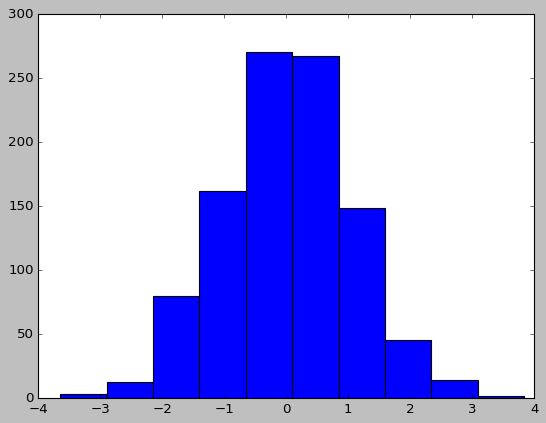

In [22]:
x = np.random.randn(1000)
plt.hist(x)

Now we can use the ``plt.rc`` function to change some of these settings:

In [0]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defined, we can now create a plot and see our settings in action:

(array([  3.,  12.,  79., 161., 270., 267., 148.,  45.,  14.,   1.]),
 array([-3.64142186, -2.89340776, -2.14539365, -1.39737954, -0.64936543,
         0.09864868,  0.84666279,  1.5946769 ,  2.34269101,  3.09070512,
         3.83871923]),
 <a list of 10 Patch objects>)

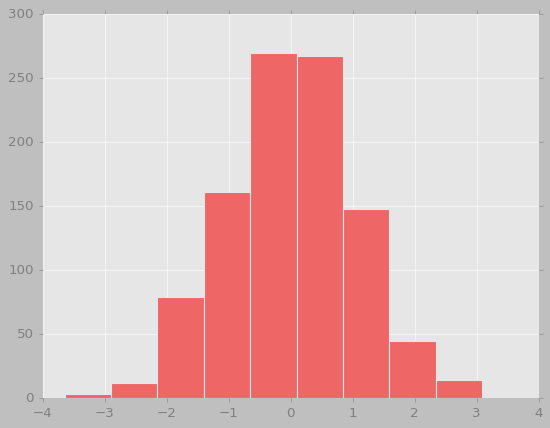

In [24]:
plt.hist(x)

Simple line plots:

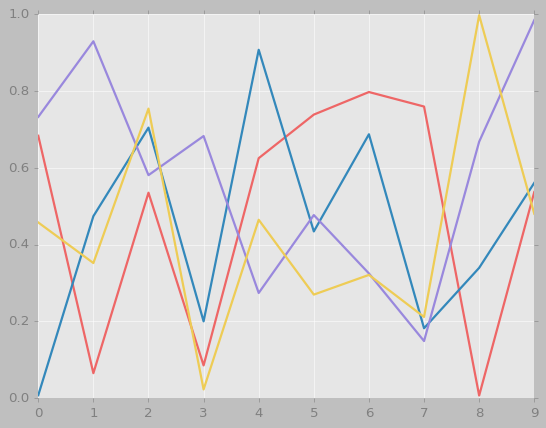

In [36]:
for i in range(4):
    plt.plot(np.random.rand(10))

While you can adjust the rc parameters as shown above to suit your own tastes, an alternative approach worth exploring is using MAtplotlib's default stylesheets.

### 4.2 Stylesheets

Matplotlib has a very convenient ``style`` module, which includes a number of default stylesheets, as well as the ability to create and package your own styles. Even if you don't create your own style, the stylesheets included by default are extremely useful. The available styles are listed in ``plt.style.available``:

In [37]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

The basic way to switch to a stylesheet is to call

``` python
plt.style.use('stylename')
```

But keep in mind that this will change the style for the rest of the session!

Alternatively, you can use the style context manager, which sets a style temporarily:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```

### Task: Explore the different stylesheets provided by Matplotlib

Let's create a function that will make two basic types of plot:

In [6]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

Now let's use this to explore how these plots look using the various built-in styles. An example with the 'classic' style is provided below

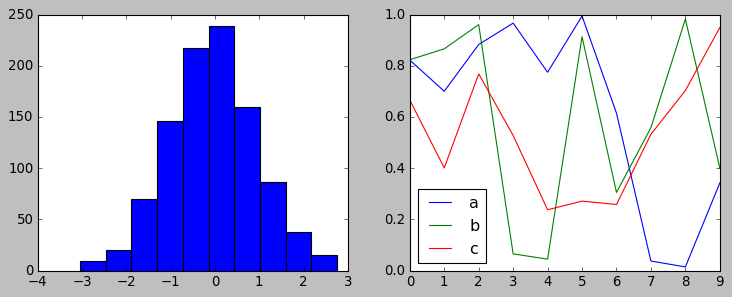

In [5]:
with plt.style.context('classic'):
    hist_and_lines()

Try other styles from the stylesheets list above!

Some popular ones are described below:

1. The ``fivethirtyeight`` style mimics the graphics found on the popular [FiveThirtyEight website](https://fivethirtyeight.com).
2. The ``ggplot`` package in the R language is a very popular visualization tool. Matplotlib's ``ggplot`` style mimics the default styles from that package.
3. There is a very nice short online book called [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/); it features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually-appealing style throughout the book.
This style is reproduced in the ``bmh`` stylesheet.
4. For figures used within presentations, it is often useful to have a dark rather than light background.
The ``dark_background`` style provides this.
5. Sometimes you might find yourself preparing figures for a print publication that does not accept color figures.
For this, the ``grayscale`` style can be very useful.
6. Matplotlib also has stylesheets inspired by the [Seaborn library](https://seaborn.pydata.org/), a popular matplotlib based library that provides a high-level interface for drawing attractive and informative statistical graphics.

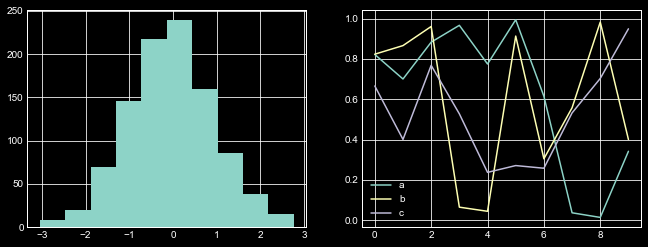

In [7]:
with plt.style.context('dark_background'):
    hist_and_lines()

##  5. Other commonly used Matplotlib features

### 5.1. Contours

A contour plot can be created with the ``plt.contour`` function.
It takes three arguments: a grid of *x* values, a grid of *y* values, and a grid of *z* values.
The *x* and *y* values represent positions on the plot, and the *z* values will be represented by the contour levels.
Perhaps the most straightforward way to prepare such data is to use the ``np.meshgrid`` function, which builds two-dimensional grids from one-dimensional arrays:

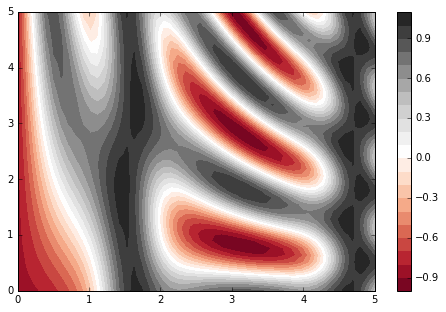

In [17]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)

# define a function to map 

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Z = f(X, Y)

# plot a filled contour plot, with 20 equally spaced intervals within the data range

plt.figure(figsize=(8,5))
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();    # a semi-colon is used here to suppress other outputs by this contourf function

### 5.2. Histograms

``plt.hist`` is used to plot histograms in just one line. With a few customizations, like ``histtype='stepfilled'`` and some transparency with `alpha`, we can get neat plots that help us compare histograms:

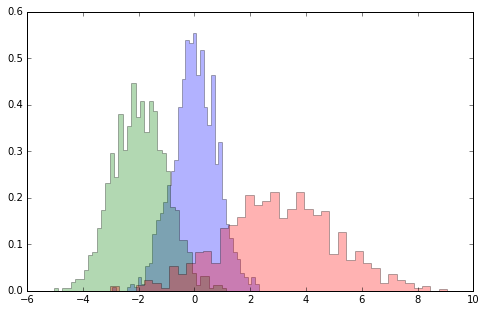

In [14]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.figure(figsize=(8,5))
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

### 5.3. 3D plots

Three-dimensional plots are enabled by importing the mplot3d toolkit, included with the main Matplotlib installation. Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use ``%matplotlib notebook`` rather than ``%matplotlib inline`` when running this code on Jupyter (``%matplotlib notebook`` does not work in Google Colab).

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples. In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ``ax.plot3D`` and ``ax.scatter3D`` functions.

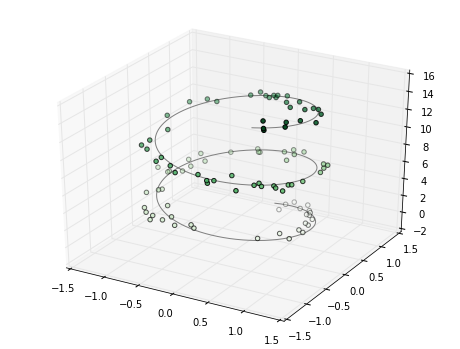

In [22]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Once the mplot3d submodule is imported, a three-dimensional axes can be created by 
# passing the keyword projection='3d' to any of the normal axes creation routines

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## 6. Further reading/exercises: [Visualization with Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html) in Python Data Science Handbook